In [12]:
import uvtools
import matplotlib.pyplot as plt
import numpy as np
from luseesky.utils import parse_fits

In [13]:
beam = parse_fits.Beam(
    "../lusee/lusee_sky_simulations/AntennaSimResults/beam_data/hfss/"
    "004_Freq1-50MHz_Delta1MHz_AntennaLength1-6m_Delta1m_AntennaAngle75deg_LanderHeight2m/"
    "RadiatedElectricField_AntennaLength1m_AntennaAngle75deg_LanderHeight2m_LBoxZ70cm_Phase+180deg.fits"
)

In [45]:
freqs = beam.frequencies * 1e6
res = np.diff(freqs).mean()
target_res =  res/10
target_freqs = np.arange(freqs.min(), freqs.max()+target_res, target_res)

In [71]:
# design matrix
B,_ = uvtools.dspec.dpss_operator(
    target_freqs, 
    filter_centers=[0],
    filter_half_widths=[20e-9],
    eigenval_cutoff=[1e-6],
)
print(f"nterms = {B.shape[1]}")
# measured
A = B[np.isin(target_freqs, freqs)]

nterms = 5


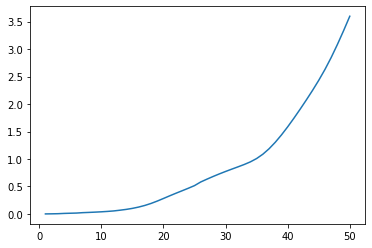

In [72]:
# random pixel
power = beam.power[:, 40, 40]
plt.figure()
plt.plot(freqs/1e6, power)
plt.show()

In [73]:
interp = B @ np.linalg.inv(A.T @ A) @ A.T @ power

/home/christian/Documents/research/ucb_research/.venv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


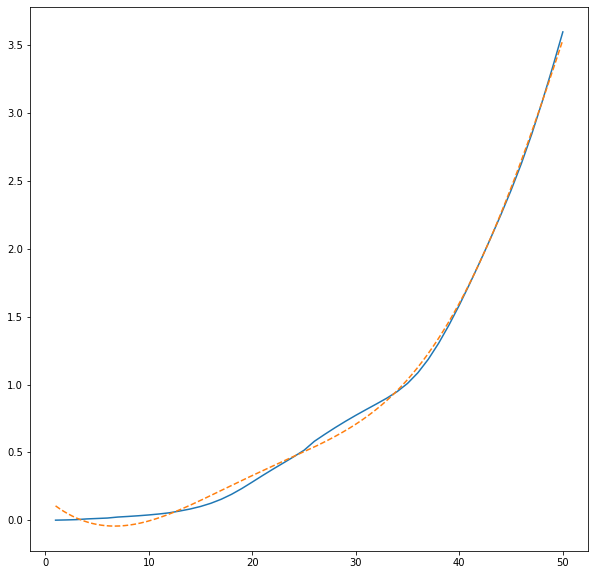

In [74]:
plt.figure(figsize=(10,10))
plt.plot(freqs/1e6, power)
plt.plot(target_freqs/1e6, interp, ls="--")
plt.show()